In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [49]:
from matplotlib import pyplot

In [5]:
aisles = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/aisles.csv")
orders = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/orders.csv")
products = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/products.csv")
departments = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/departments.csv")
order_train = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/order_products__train.csv")
order_prior = pd.read_csv("C:/Users/Nicole's PC/Desktop/Capstone Project/Instacart data/order_products__prior.csv")

In [6]:
instacart = pd.merge(aisles, products, on = "aisle_id")
instacart = pd.merge(departments, instacart, on = "department_id")
instacart = pd.merge(order_prior, instacart, on = "product_id")
instacart = pd.merge(instacart, orders, on = "order_id")

In [7]:
instacart.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites,202279,prior,3,5,9,8.0
1,2,28985,2,1,4,produce,83,fresh vegetables,Michigan Organic Kale,202279,prior,3,5,9,8.0
2,2,9327,3,0,13,pantry,104,spices seasonings,Garlic Powder,202279,prior,3,5,9,8.0
3,2,45918,4,1,13,pantry,19,oils vinegars,Coconut Butter,202279,prior,3,5,9,8.0
4,2,30035,5,0,13,pantry,17,baking ingredients,Natural Sweetener,202279,prior,3,5,9,8.0


In [8]:
# removing unnecessary attributes
instacart.drop(["order_id", "add_to_cart_order"], axis = 1)

,product_id,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,33120,1,16,dairy eggs,86,eggs,Organic Egg Whites,202279,prior,3,5,9,8.0
1,28985,1,4,produce,83,fresh vegetables,Michigan Organic Kale,202279,prior,3,5,9,8.0
2,9327,0,13,pantry,104,spices seasonings,Garlic Powder,202279,prior,3,5,9,8.0
3,45918,1,13,pantry,19,oils vinegars,Coconut Butter,202279,prior,3,5,9,8.0
4,30035,0,13,pantry,17,baking ingredients,Natural Sweetener,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,47680,0,5,alcohol,28,red wines,Indian Wells Merlot,189140,prior,2,3,11,20.0
32434485,34390,0,11,personal care,47,vitamins supplements,Fish Oil 1000 mg+300 mg Omega-3 Softgels,182854,prior,10,5,15,2.0
32434486,31530,0,17,household,114,cleaning products,Disinfecting Toilet Bowl Cleaner,51836,prior,12,0,18,0.0
32434487,39759,0,11,personal care,11,cold flu allergy,"Indoor & Outdoor Allergies, Allergy & Congesti...",37237,prior,50,6,16,2.0


In [9]:
# replacing NAs with 0
instacart["days_since_prior_order"] = instacart["days_since_prior_order"].fillna(0)

In [15]:
segment = pd.crosstab(instacart["user_id"],instacart["aisle"])
segment.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [71]:
#normalize data
segment_n = segment.div(segment.sum(axis = 1), axis = 0)
segment_n

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.00000,0.0,0.000000,0.0,0.010256,0.000000,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.000000,0.000000,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.000000,0.000000,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.0,0.000000,0.03125,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.156250
206206,0.0,0.014035,0.00000,0.0,0.000000,0.0,0.014035,0.003509,0.0,0.0,...,0.003509,0.000000,0.000000,0.000000,0.000000,0.003509,0.0,0.003509,0.0,0.000000
206207,0.0,0.000000,0.00000,0.0,0.004484,0.0,0.000000,0.000000,0.0,0.0,...,0.013453,0.017937,0.000000,0.008969,0.004484,0.000000,0.0,0.049327,0.0,0.067265


In [122]:
pca = PCA(n_components = 8)
data_pca = pca.fit_transform(segment)
data_pca = pd. DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7
0,-24.217110,2.429109,-2.466594,-0.144934,0.268924,-1.431299,2.138162,-2.727711
1,6.467553,36.752516,8.382904,15.094727,-6.920823,-0.981247,6.011320,3.778670
2,-7.992082,2.403710,-11.030455,0.673318,-0.442339,-2.822701,-6.284116,6.511604
3,-27.992524,-0.756074,-1.921943,2.092523,-0.288231,0.926439,0.827190,0.614762
4,-19.897956,-2.637627,0.532922,3.680088,0.612825,-1.623697,-3.935548,2.004974


In [123]:
SSD = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data_pca)
    SSD.append(km.inertia_)

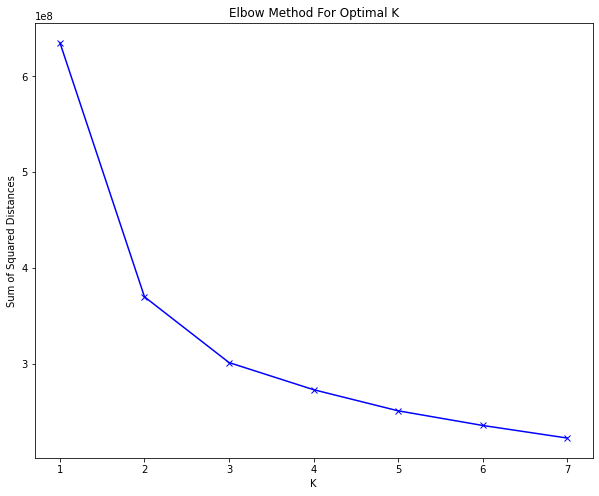

In [124]:
plt.subplots(figsize = (10, 8))
plt.plot(K, SSD, "bx-")
plt.xlabel("K")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method For Optimal K")
plt.show()

The above graph shows optimal K as 4

In [106]:
cluster = KMeans(n_clusters= 4,random_state=1).fit(data_pca)
centroids = cluster.cluster_centers_
cluster_predict = cluster.predict(data_pca)
print(centroids)

[[ 2.19191111e+02 -1.09340702e+01 -3.17092673e+00  7.12211698e+00
   2.56981465e-01  2.22025675e+00  8.31510909e-01  2.73064449e-01]
 [-1.92919264e+01 -3.55360708e-01 -2.83290181e-01  6.62398654e-01
   2.36845923e-02  2.42389018e-01  9.61874147e-02  5.88537174e-02]
 [ 2.11094694e+01  5.17527393e-01  1.26597253e+00 -2.40396162e+00
  -2.39803972e-01 -9.25110892e-01 -3.20123878e-01 -2.02113480e-01]
 [ 9.30207024e+01  5.32661665e+00  2.06384760e-01 -2.07205126e+00
   3.86560696e-01 -5.18905103e-01 -3.33562520e-01 -1.22425076e-01]]


In [107]:
temp_df = data_pca.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = cluster_predict
temp_df.head()

C:\Users\Nicole's PC\AppData\Local\Temp\ipykernel_19048\1529279591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = cluster_predict


,pc1,pc2,cluster
0,-24.220247,2.429442,1
1,6.482067,36.750941,2
2,-7.996299,2.404434,1
3,-27.995410,-0.755814,1
4,-19.901364,-2.637199,1


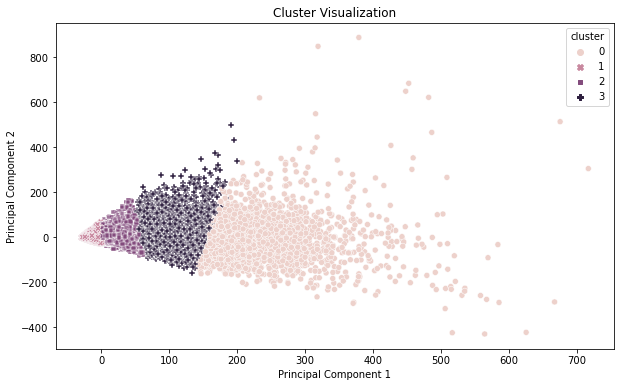

In [108]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster", style = "cluster")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

In [109]:
segment['cluster'] = cluster_predict

cluster1 = segment[segment.cluster == 0]
cluster2 = segment[segment.cluster == 1]
cluster3 = segment[segment.cluster == 2]
cluster4 = segment[segment.cluster == 3]

In [115]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:8]
#print(cluster1.shape)

aisle
fresh fruits                  156.108440
fresh vegetables              154.229737
packaged vegetables fruits     66.907490
yogurt                         51.151202
packaged cheese                30.938234
milk                           29.719117
soy lactosefree                19.659586
bread                          18.129681
dtype: float64

In [116]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:8]

aisle
fresh fruits                     5.831940
fresh vegetables                 5.274311
packaged vegetables fruits       3.138460
yogurt                           2.602099
water seltzer sparkling water    2.267027
packaged cheese                  2.044604
milk                             1.810282
chips pretzels                   1.783024
dtype: float64

In [117]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:8]

aisle
fresh fruits                     29.560881
fresh vegetables                 29.041725
packaged vegetables fruits       14.814318
yogurt                           11.919789
packaged cheese                   8.068628
milk                              7.125972
water seltzer sparkling water     6.803159
chips pretzels                    5.929728
dtype: float64

In [118]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:8]

aisle
fresh fruits                     76.692991
fresh vegetables                 68.223408
packaged vegetables fruits       34.582295
yogurt                           30.071583
packaged cheese                  17.939016
milk                             17.072479
water seltzer sparkling water    12.957080
chips pretzels                   11.764649
dtype: float64